  ## Libraries

In [1]:
# IMPORT THESE FIRST.
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.datasets import (make_classification, make_blobs, load_breast_cancer, make_regression, make_friedman1,
                              load_iris)
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import cross_val_score, validation_curve, train_test_split
pd.set_option('display.max_columns', 1000)


In [2]:
df = pd.read_excel("https://github.com/TechLabs-Berlin/wt21-pet-match/blob/main/data_set/pet-set.xlsx?raw=true")
df.head()

,How old is your cat (years)?,How long have you owned your cat (years)?,Is your cat male or female?,Where did you get your cat from?,Other (please specify),Is your cat neutered?,What breed is your cat?,Other (please specify).1,Does your cat have access to the outdoors?,"If yes, does your cat have constant access, or is this restricted in some way (i.e. the cat is kept in at night or is only let out when someone is home)",Does your cat have a litter tray?,Does your cat have any existing medical conditions?,"If yes, what condition does he/she suffer from?",Was this condition present before you acquired your cat?,Does your cat display any behavioural problems,"If yes, what behavioural problem does he/she display?",Was this problem present before you acquired your cat?,Does your cat suffer from a urinary tract infection (e.g. cystitis)?,Does your cat urinate inside the house in a location other than the litter tray?,"Does your cat spray urine on any vertical surfaces (e.g. curtains, kitchen, cabinets, doors, walls)?",Does your cat defecate inside the house in a location other than the litter tray?,Does your cat vomit?,Does your cat suffer from diarrhoea?,Does your cat suffer from constipation?,How would you describe your cat's weight?,What is the condition of your cat's coat (1-poor condition - 5-excellent condition),My cat is keen to explore new things in his/her environment,My cat is playful,My cat is vocal when around people,"My cat behaves aggressively (i.e. growls, hisses, bites, swipes with claws) towards me when I perform routine health procedures (such as grooming/carrying out health checks, or when administering medication, etc.)","My cat tries to avoid me when I try to encourage interactions (i.e. when I call his/her name in a friendly voice, when I make kissing noises, or crouch down and offer it my fingers etc.)",My cat tries to avoid me when I go to stroke him/her or tickle his/her chin/cheeks,"When I initiate contact or interaction with my cat, he/she doesn't move away but it is quiet and not very responsive towards me (i.e. it doesn't purr or rub up against me)","My cat behaves aggressively (i.e. growls, hisses, bites and swipes with claws) towards me when I stroke him/her","My cat will come and say ""hello"" and approach me (i.e. the cat will approach and make physical contact with me), but will then wander off or move away shortly afterwards rather than staying for a long fuss","My cat comes and asks me for attention and initiates contact with me (e.g. the cat comes and sits on my knee, or rubs up against me and around me, in order to receive fuss/strokes/chin/cheek tickles)","My cat gets carried away during play, which has led me to being bitten or swiped",I avoid stroking or handling my cat because I feel that he/she doesn't want me to,"I avoid stroking my cat because I think he/she will behave aggressively towards me (i.e. growl, hiss, bite, swipe with claws)",My cat seems angry around me,My cat is more keen to interact with and be near me when I have food/treats,My cat is comfortable being picked up,My cat is timid,My cat is quick to settle and to adapt to change,"My cat would prefer to be left alone, rather than be with people",My cat likes being stroked,My cat is very tolerant to being handled,"If my cat could choose, it would prefer to have a bowl of food rather than interaction with me","My cat has negatively changed the way he/she interacts with me since I first acquired him/her (e.g. has become more fearful, behaves aggressively, is less friendly)","My cat has positively changed in the way he/she interacts with me since I first acquired him/her (e.g. has become less fearful, behaves less aggressively, is more friendly)",My cat behaves differently with strangers than he/she does with me,My cat behaves differently with me than he/she does with other (human) members of the household,My cat is friendly,My cat is fearful,My cat has met all my expectations,I am happy with my cat,I feel my cat is happy living w

In [3]:
df_new = df.rename(columns={"How old is your cat (years)?" : "cat_age","How long have you owned your cat (years)?":"ownership_duration",
                   "Is your cat male or female?":"cat_gender","Where did you get your cat from?":"cat_origin",
                   "Other (please specify)":"other_origin","Is your cat neutered?":"cat_neuter","What breed is your cat?":"cat_breed",
                  "Other (please specify).1":"other_breed","Does your cat have access to the outdoors?":"outdoor_access",
                  "If yes, does your cat have constant access, or is this restricted in some way (i.e. the cat is kept in at night or is only let out when someone is home)":"access_typ",
                  "Does your cat have a litter tray?":"litter_tray","Does your cat have any existing medical conditions?":"medic_cond"}, inplace = True)




<AxesSubplot:title={'center':'cat place'}>

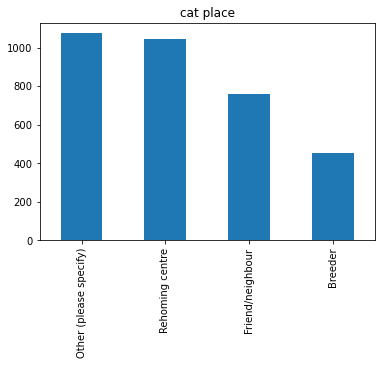

In [4]:
df["cat_origin"].value_counts().plot(kind='bar',title='cat place' ,label= '.')


In [5]:
df_breed = df.loc[df["cat_breed"] =="Other (please specify)"]
#df["other_breed"].value_counts()
df_breed["other_breed"].isna().value_counts()

False    620
Name: other_breed, dtype: int64

### variable discribing the satisfaction level in percentage

In [6]:
# replacing strings with numerical values
df['expectations'] = df['My cat has met all my expectations'].replace({'Strongly agree': 5, 'Agree': 4, 'Neither agree nor disagree': 3, 'Disagree': 2, 'Strongly disagree': 1})
df['happy_owner'] = df['I am happy with my cat'].replace({'Strongly agree': 5, 'Agree': 4, 'Neither agree nor disagree': 3, 'Disagree': 2, 'Strongly disagree': 1})
df['happy_cat'] = df['I feel my cat is happy living with me'].replace({'Strongly agree': 5, 'Agree': 4, 'Neither agree nor disagree': 3, 'Disagree': 2, 'Strongly disagree': 1})
df['rehome'] = df['I have considered relinquishing or rehoming this cat to someone else'].replace({'Strongly agree': 1, 'Agree': 2, 'Neither agree nor disagree': 3, 'Disagree': 4, 'Strongly disagree': 5})

# aggregating final score
df['satisf_level'] = (df['expectations'] + df['happy_owner'] + df['happy_cat'] + df['rehome'])/20

In [7]:
Satisf_score =df['satisf_level'].value_counts()
#Satisf_score.plot(kind='bar',title='Satisfaction Distribution' ,label= '.')
Satisf_score

1.00    1940
0.95     491
0.90     286
0.85     250
0.80     133
0.75      62
0.70      38
0.65      13
0.60      12
0.55       8
0.40       5
0.50       5
0.35       2
0.45       2
0.25       1
Name: satisf_level, dtype: int64

###idea (Hany)

- for training the model we can consider the good match if Satisfaction is 1 


# Owners / Adopters

The aggregarion was made by Hany, all comments also belong to him:)
Personality traits grouped in five scores according to BFI:

* Extraversion

* Agreeableness

* Conscientiousness

* Neuroticism  (how tense and moody the person )

* Creativity

In [8]:
# slice with the BFI relevant adopters data
adopters = df.iloc[:, 61:]
# remove the NaN , they are text here
adopters.replace("NaN",np.nan, inplace =True)
adopters.fillna(0,inplace=True)

# lisitng the Reverse questions (take care of the numbering)
rev_col = adopters.iloc[:,[1,5,7,8,11,17,20,22,23,26,30,33,34,36,40,42]]
rev_ques = rev_col.replace({'Agree strongly': 1, 'Agree a little': 2, 'Neither agree nor disagree': 3, 'Disagree a little': 4, 'Disagree strongly': 5})

#listing normal questions 
normal_ques = adopters.drop(columns = rev_col).replace({'Agree strongly': 5, 'Agree a little': 4, 'Neither agree nor disagree': 3, 'Disagree a little': 2, 'Disagree strongly': 1})

# make them into one set, 
adopt_score =  pd.concat([ normal_ques, rev_ques], axis=1)

#adopt_score.head()

#### note: the code may require some refactoring (working with the bigger set )
- **used "conctinate instade of inplace= True** : with .replace it gets warning " copy of a slice from a DataFrame" and the inplace is not fully happpening espically when applaying that for the 2nd time 

#### clastering (seems little hard coded, due to the use of concatinate)

- rules (all them are re-aggranged as follows)
Extraversion:(8 questions) 1, 6R, 11, 16, 21R, 26, 31R, 36
Agreeableness: (9 questions)2R, 7, 12R, 17, 22, 27R, 32, 37R, 42 ## high no = high agreebleness 
Conscientiousness: (9 questions)3, 8R, 13, 18R, 23R, 28, 33, 38, 43R
Neuroticism:(8 questions) 4, 9R, 14, 19, 24R, 29, 34R, 39
Openness: (10 ques )5, 10, 15, 20, 25, 30, 35R, 40, 41R, 44 

In [9]:
# arrange them for better reading.


extraversion = adopt_score.iloc[:,[0,29,6,10,34,16,38,22]]          ##Extraversion

agreeableness = adopt_score.iloc[:,[28,4,32,11,14,37,20,41,26]]     ##Agreeableness

conscientiousness = adopt_score.iloc[:,[1,30,7,33,35,17,21,23,43]]  ##Conscientiousness

neuroticism = adopt_score.iloc[:,[2,31,8,12,36,18,39,24]]          ##Neuroticism  (how tense and moody the person )

creativity = adopt_score.iloc[:,[3,5,9,13,15,19,40,25,42,-1]]      ## openess & creativity


## putting them into columns with precenatges (it can be added to any df )

adopt_score["extraversion"] =extraversion.sum(axis=1)/(len(extraversion.columns)*5)
adopt_score["easy_going"] =agreeableness.sum(axis=1)/(len(agreeableness.columns)*5)
adopt_score["diligent"] =conscientiousness.sum(axis=1)/(len(conscientiousness.columns)*5)
adopt_score["moody_tense"] =neuroticism.sum(axis=1)/(len(neuroticism.columns)*5)
adopt_score["creative"] =creativity.sum(axis=1)/(len(creativity.columns)*5)

adopt_scores_only = adopt_score[["extraversion", "easy_going", "diligent", "moody_tense", "creative"]]

In [10]:
#adopt_scores_only.head(3)

# Cats

Grouping cats into 4 personalitiy-Cluster performed by Dayo, I changed it a bit so that we get comparable scores for cats and adopters.

* PC1: Gregariousness (confident, friendly, interactive

* PC: Aggressiveness (agonistic when handled or interacted with)

* PC: Aloofness/avoidance(avoidant of interaction, not friendly

* PC4: Anxiousness/fearfulness (wary of novel/less familiarpeople)


In [11]:
cats_pc = df.iloc[:, 26 : 54]
# remove the NaN , they are text here
cats_pc.replace("NaN",np.nan, inplace =True)
cats_pc.fillna(0,inplace=True)

# listing the Reverse questions (take care of the numbering)
rev_col_c = cats_pc.iloc[:,[9,16,18,19,20,27]].rename(columns = {"My cat comes and asks me for attention and initiates contact with me (e.g. the cat comes and sits on my knee, or rubs up against me and around me, in order to receive fuss/strokes/chin/cheek tickles)": 'REVERSED My cat comes and asks me for attention and initiates contact with me',
                                          'My cat is timid': 'REVERSED My cat is timid',
                                          'My cat likes being stroked': 'REVERSED My cat likes being stroked',
                                          'My cat is very tolerant to being handled': 'REVERSED My cat is very tolerant to being handled',
                                          'My cat is fearful': 'REVERSED My cat is fearful',
                                          'My cat would prefer to be left alone, rather than be with people': 'REVERSED My cat would prefer to be left alone, rather than be with people'})
rev_ques_c = rev_col_c.replace({'Strongly disagree': 5, 'Never': 5, 'Disagree': 4, 'Once': 4, 'Neither agree nor disagree': 3, 'Occasionally': 3, 'Agree': 2, 'Usually': 2, 'Strongly agree': 1, 'Always': 1})

#listing normal questions 
normal_ques_c = cats_pc.replace({'Strongly disagree': 1, 'Never': 1, 'Disagree': 2, 'Once': 2, 'Neither agree nor disagree': 3, 'Occasionally': 3, 'Agree': 4, 'Usually': 4, 'Strongly agree': 5, 'Always': 5}).drop(columns=cats_pc.iloc[:, [18, 19, 22]])

# make them into one set, 
cats_score =  pd.concat([normal_ques_c, rev_ques_c], axis=1)

# grouping
gregariousness = cats_score.iloc[:,[0,1,2,9,15,17,18,23,24,26,27]] #Gregariousness (confident, friendly, interactive)
aggressiveness = cats_score.iloc[:,[3,7,10,11,12,13,29]] #Aggressiveness (agonistic when handled or interacted with)
avoidance = cats_score.iloc[:,[4,5,6,8,14,19,25,28]] #Aloofness/avoidance(avoidant of interaction, not friendly)
anxiousness = cats_score.iloc[:,[16,20,21,22,24,]] #Anxiousness/fearfulness (wary of novel/less familiarpeople)

# aggregating to percentages
cats_score["friendly"] =gregariousness.sum(axis=1)/(len(gregariousness.columns)*5)
cats_score["agressive"] =aggressiveness.sum(axis=1)/(len(aggressiveness.columns)*5)
cats_score["avoidant"] =avoidance.sum(axis=1)/(len(avoidance.columns)*5)
cats_score["anxious"] =anxiousness.sum(axis=1)/(len(anxiousness.columns)*5)

cats_scores_only = cats_score[["friendly","agressive", "avoidant", "anxious"]]

In [12]:
df_scores = pd.concat([cats_scores_only, adopt_scores_only, df["satisf_level"]], axis=1)
df_scores.head(3)

,friendly,agressive,avoidant,anxious,extraversion,easy_going,diligent,moody_tense,creative,satisf_level
0,0.690909,0.314286,0.650,0.68,0.675,0.822222,0.711111,0.70,0.64,1.00
1,0.654545,0.571429,0.475,0.60,0.675,0.800000,0.800000,0.75,0.78,1.00
2,0.654545,0.514286,0.700,0.64,0.625,0.418889,0.466667,0.60,0.28,0.85


# Three datasets with scores only:

* adopt_scores_only: personality scores of potential adopters
* cats_scores_only: cats' personality scores
* df_scores: cats' and owners' scores + satisfaction level

In [13]:
adopt_scores_only.head(5)

,extraversion,easy_going,diligent,moody_tense,creative
0,0.675,0.822222,0.711111,0.700,0.64
1,0.675,0.800000,0.800000,0.750,0.78
2,0.625,0.418889,0.466667,0.600,0.28
3,0.575,0.800000,0.577778,0.925,0.72
4,0.575,0.733333,0.666667,0.675,0.58


In [14]:
cats_scores_only.head(5)

,friendly,agressive,avoidant,anxious
0,0.690909,0.314286,0.650,0.68
1,0.654545,0.571429,0.475,0.60
2,0.654545,0.514286,0.700,0.64
3,0.727273,0.371429,0.450,0.84
4,0.709091,0.342857,0.550,0.76


In [15]:
df_scores.head(5)

,friendly,agressive,avoidant,anxious,extraversion,easy_going,diligent,moody_tense,creative,satisf_level
0,0.690909,0.314286,0.650,0.68,0.675,0.822222,0.711111,0.700,0.64,1.00
1,0.654545,0.571429,0.475,0.60,0.675,0.800000,0.800000,0.750,0.78,1.00
2,0.654545,0.514286,0.700,0.64,0.625,0.418889,0.466667,0.600,0.28,0.85
3,0.727273,0.371429,0.450,0.84,0.575,0.800000,0.577778,0.925,0.72,1.00
4,0.709091,0.342857,0.550,0.76,0.575,0.733333,0.666667,0.675,0.58,1.00


In [16]:
df_scores.isna().value_counts()

friendly  agressive  avoidant  anxious  extraversion  easy_going  diligent  moody_tense  creative  satisf_level
False     False      False     False    False         False       False     False        False     False           3248
                                                                                                   True              83
dtype: int64

# correlation studies

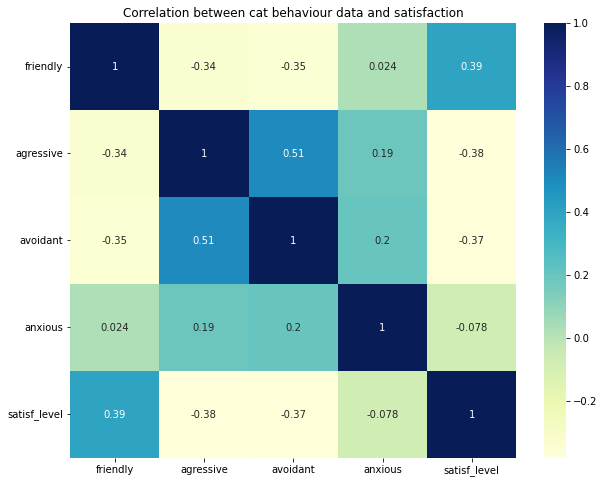

In [17]:
# Cat behaviour and satisfaction  
data_cat_behaviour = pd.concat([cats_scores_only, df["satisf_level"]], axis=1)
corrMatrix_cat = data_cat_behaviour.corr()


sn.heatmap(corrMatrix_cat,annot= True, ax=plt.axes(), cmap="YlGnBu").set_title("Correlation between cat behaviour data and satisfaction")
plt.gcf().set_size_inches(10, 8)

plt.show()

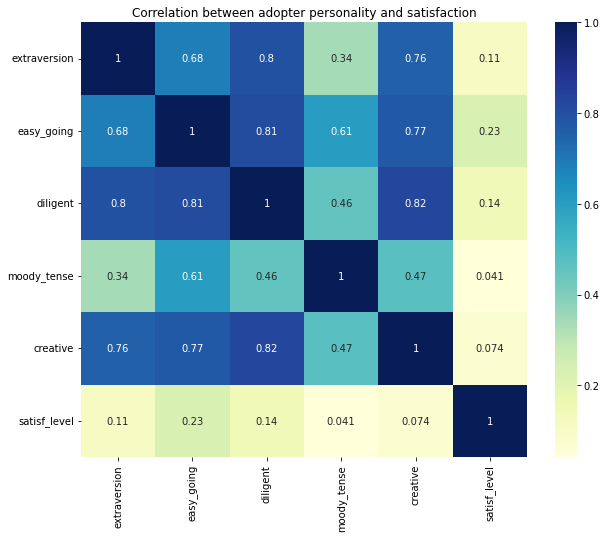

In [18]:
# adopter personality and stisfaction 
adopt_personality_data = pd.concat([adopt_scores_only, df["satisf_level"]], axis=1)

corrMatrix_adopt = adopt_personality_data.corr()


sn.heatmap(corrMatrix_adopt,annot= True, ax=plt.axes(), cmap="YlGnBu").set_title("Correlation between adopter personality and satisfaction")
plt.gcf().set_size_inches(10, 8)

plt.show()

- Notes 
#### 1.Cat Anxiousness is not a strong factor in saisfaction 
#### 2. people like friendly cats (friendly is a very strong indactor of good satisfaction)
#### 3. there is no obvous correlation between personality and satisfaction ?? (maybe i am wrong)

 ### experiment(correlation between adopter personality and cat traits)
 to get a meaningful results : we split the data set to **only include samples with " Satisf_score less than 1"** people with 1 satisifaction feels like they have very inconsistant results


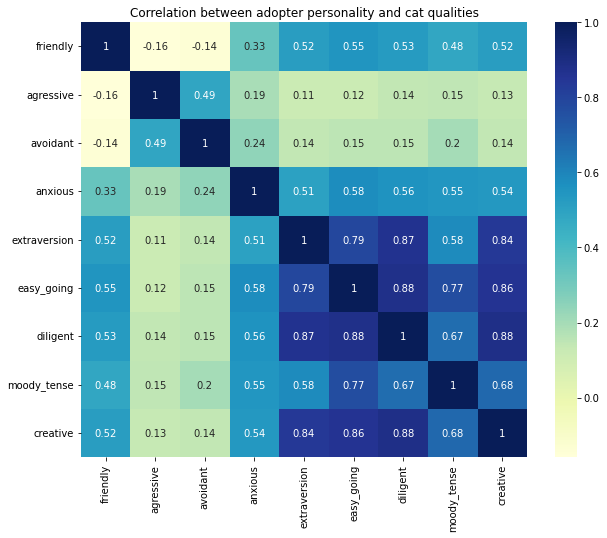

In [19]:
# data_set new 
df_Match =df_scores.loc[df_scores["satisf_level"] !=1].drop(columns=["satisf_level"])   ## dropped Satisf_score 
# adopter personality and cat traits 

corrMatrix_match = df_Match.corr()
sn.heatmap(corrMatrix_match,annot= True, ax=plt.axes(), cmap="YlGnBu").set_title("Correlation between adopter personality and cat qualities")
plt.gcf().set_size_inches(10, 8)

plt.show()


In [20]:
#now we have a Dataset to be used for matching using "linar regrssion" 
#there is a correlation between cat persona and human personality socres 
# we need to predict "psersnality_human" with the "breed ":

#to do so i made a quick coorealtion 

In [21]:
#df_match = pd.concat([df_scores, df[["cat_age","ownership_duration","cat_origin","other_origin","cat_neuter","cat_breed","other_breed","outdoor_access"]]], axis=1)
df_match = pd.concat([df_scores, df[["cat_age","ownership_duration","other_breed","Age"]]], axis=1)
dfbreed = df_match.loc[(df["cat_breed"] =="Other (please specify)") & (df["satisf_level"]==1)].fillna(0)

dfbreed


,friendly,agressive,avoidant,anxious,extraversion,easy_going,diligent,moody_tense,creative,satisf_level,cat_age,ownership_duration,other_breed,Age
5,0.654545,0.314286,0.375,0.56,0.600,0.600000,0.733333,0.725,0.68,1.0,13,13,siamese,45-54
8,0.836364,0.257143,0.275,0.72,0.825,0.844444,0.777778,0.675,0.68,1.0,10,10,Ragdoll,25-34
21,0.690909,0.400000,0.375,0.48,0.650,0.755556,0.888889,0.600,0.72,1.0,17,17,Maine Coon,55-64
31,0.890909,0.200000,0.275,0.52,0.725,0.688889,0.800000,0.725,0.62,1.0,4,4,Maine coon cat,45-54
38,0.854545,0.428571,0.350,0.72,0.750,0.733333,0.644444,0.900,0.58,1.0,16,16,Seal Point Siamese,25-34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3312,0.581818,0.314286,0.575,0.88,0.600,0.666667,0.777778,0.600,0.68,1.0,15,15,Bombay,65 and over
3320,0.854545,0.200000,0.275,0.68,0.825,0.822222,0.933333,0.475,0.88,1.0,7,7,Ginger Tabby,45-54
3327,0.781818,0.257143,0.225,0.64,0.700,0.755556,0.800000,0.425,0.80,1.0,7,7,Ragdoll,45-54
3329,0.872727,0.342857,0.300,0.76,0.675,0.733333,0.822222,0.750,0.70,1.0,1,1,Maine Coon,35-44


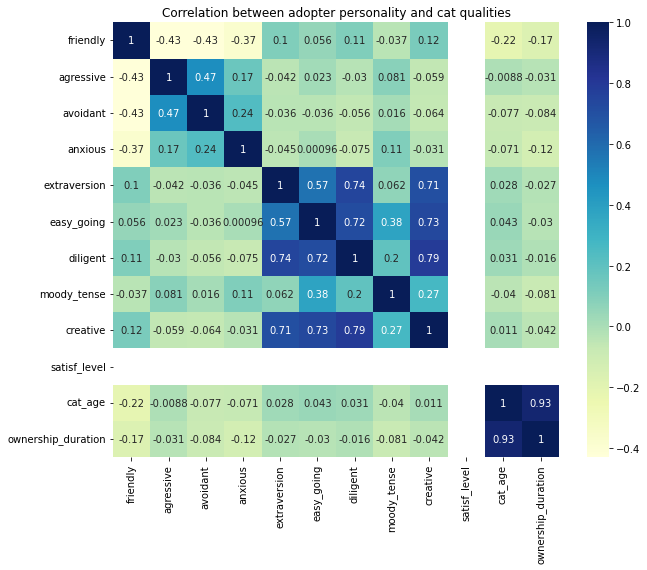

In [22]:
dfbreed_matrix = dfbreed.corr()
sn.heatmap(dfbreed_matrix ,annot= True, ax=plt.axes(), cmap="YlGnBu").set_title("Correlation between adopter personality and cat qualities")
plt.gcf().set_size_inches(10, 8)


#### at stisfaction level == 1 the cat personlity score have no meaning so we can use this to predict the matching breed 

In [23]:
#Satisf_score1 =dfbreed['satisf_level'].value_counts()
#Satisf_score1.plot(kind='bar',title='Satisfaction Distribution' ,label= '.'

In [24]:
df_match2 = pd.concat([adopt_scores_only, df["other_breed"]], axis=1)

dfbreed_predict = df_match2.loc[(df["cat_breed"] =="Other (please specify)") & (df["satisf_level"]==1)].fillna(0)
dfbreed_predict



,extraversion,easy_going,diligent,moody_tense,creative,other_breed
5,0.600,0.600000,0.733333,0.725,0.68,siamese
8,0.825,0.844444,0.777778,0.675,0.68,Ragdoll
21,0.650,0.755556,0.888889,0.600,0.72,Maine Coon
31,0.725,0.688889,0.800000,0.725,0.62,Maine coon cat
38,0.750,0.733333,0.644444,0.900,0.58,Seal Point Siamese
...,...,...,...,...,...,...
3312,0.600,0.666667,0.777778,0.600,0.68,Bombay
3320,0.825,0.822222,0.933333,0.475,0.88,Ginger Tabby
3327,0.700,0.755556,0.800000,0.425,0.80,Ragdoll
3329,0.675,0.733333,0.822222,0.750,0.70,Maine Coon


In [ ]:
## clean the breed data 
pd.set_option('display.max_rows', 1000)
dfbreed_predict["other_breed"].value_counts()



# Clustering KNN (breed prediction )

In [26]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from matplotlib import cm

X - adopt_scores_only

In [27]:
x_people = dfbreed_predict[['extraversion', 'easy_going', 'diligent', 'moody_tense','creative']]
y_cats = dfbreed_predict["other_breed"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_people, y_cats, random_state=0)

In [29]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
# we must apply the scaling to the test set that we computed for the training set
X_test_scaled = scaler.transform(X_test)

In [30]:
knn = KNeighborsClassifier(n_neighbors = 15)
knn.fit(X_train_scaled, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train_scaled, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test_scaled, y_test)))

Accuracy of K-NN classifier on training set: 0.13
Accuracy of K-NN classifier on test set: 0.05


### Seems that it is a wrong  direction 

In [31]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures


In [32]:
### kNN Nick###